# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
import matplotlib.pyplot as plt

In [23]:
d_children = data.groupby('children').agg({'debt': ['count', 'sum', 'mean']})
display(d_children)

debt                
          count   sum      mean
children                       
0         14091  1063  0.075438
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000

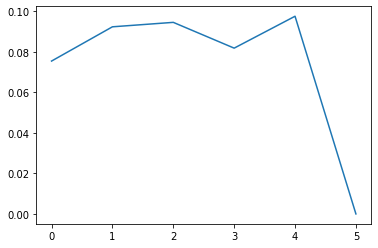

In [24]:
plt.plot(d_children['debt']['mean'])
plt.show()

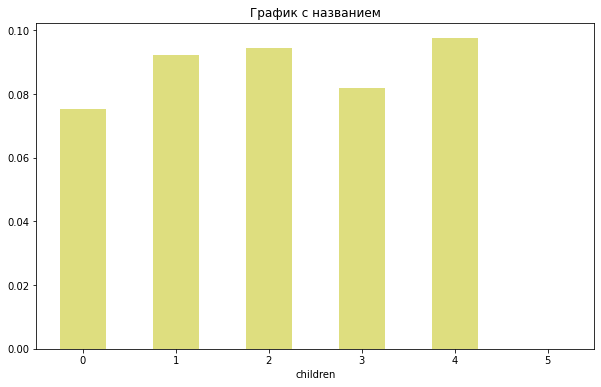

In [27]:
d_children['debt']['mean'].plot(kind='bar', figsize=(10,6), title='График с названием', color='y', alpha=0.5, rot=0)
plt.show()

**Вывод:** 

Имеется небольшая зависимость возврата кредита в срок от количества детей - те, у кого нет детей возвращают кредиты в срок чаще, чем те, у кого дети есть.
Выборка по тем, у кого 5 детей слишком мала, ее можно не брать в расчет.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [36]:
d_family_status = data.groupby('family_status').agg({'debt': ['count', 'sum', 'mean']})
display(d_family_status)

debt               
                       count  sum      mean
family_status                              
Не женат / не замужем   2796  273  0.097639
в разводе               1189   84  0.070648
вдовец / вдова           951   63  0.066246
гражданский брак        4134  385  0.093130
женат / замужем        12261  927  0.075606

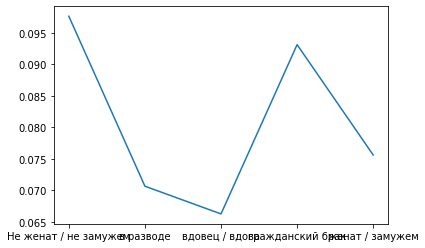

In [37]:
plt.plot(d_family_status['debt']['mean'])
plt.show()

**Вывод:** 

Имеется зависимость возврата кредита в срок от семейного положения - не женатые/ не замужем и находящиеся в гражданском браке чаще задерживают выплаты по кредитам.
Реже всего задерживают разведенные и вдовцы.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [38]:
d_income = data.groupby('total_income_category').agg({'debt': ['count', 'sum', 'mean']})
display(d_income)

debt                
                       count   sum      mean
total_income_category                       
A                         25     2  0.080000
B                       5014   354  0.070602
C                      15921  1353  0.084982
D                        349    21  0.060172
E                         22     2  0.090909

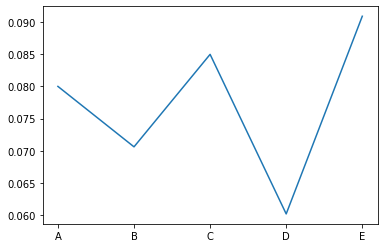

In [39]:
plt.plot(d_income['debt']['mean'])
plt.show()

**Вывод:** 

Реже всего задерживают выплаты люди в категории D, т.е с маленьким доходом в 30001–50000.
Обращаю внимание на то, что выборка людей с доходом из категории Е (менее 30000) слишком мала (всего 22 человека), что говорит о том, что банк изначально отказывал таким клиентам и все же из 22 человек 2 нарушили сроки выплаты кредита. Данная категория потенциально несет в себе риски, однако для более детального анализа необходимы еще данные.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [40]:
d_purpose = data.groupby('purpose_category').agg({'debt': ['count', 'sum', 'mean']})
display(d_purpose)

debt               
                          count  sum      mean
purpose_category                              
операции с автомобилем     4279  400  0.093480
операции с недвижимостью  10751  780  0.072551
получение образования      3988  369  0.092528
проведение свадьбы         2313  183  0.079118

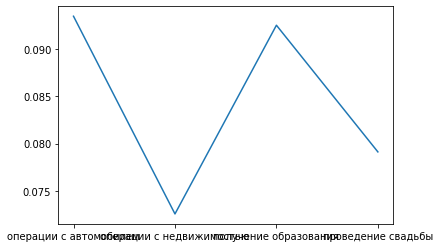

In [41]:
plt.plot(d_purpose['debt']['mean'])
plt.show()

**Вывод:** 

Имеется зависимость возврата в срок от типа кредита:
<font color='blue'>
- чаще возвращают в срок кредиты на недвижимость и на свадьбу;
- реже - по операциям с автомобилем и на образование.</font>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Это скорее всего неслучайные пропуски - либо опрашиваемые отказывались предоставлять данные по доходу и стажу, либо форма сбора данных не содержала необходимых полей для заполнения.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Пропуски в количественных переменных заполняют характерными для определенного набора данных значениями. В данном случае в столбцах с данными по стажу и доходом мы имеем сильно разрозненные по величинам данные - есть и очень большие и очень маленькие. Среднее арифметическое лучше использовать с данными, величины которых приблизительно равны друг другу, так как оно может быть значительно больше или меньше большинства чисел. А так как медиана - это уровень показателя, который делит набор данных на две равные половины, то на неё не влияют выбивающиеся из общей массы числа.

### Шаг 4: общий вывод.

Исходя из данных чаще всего вовремя погашают кредиты на недвижимость вдовы/вдовцы без детей с доходом в диапазоне 30 001–50 000.
<font color='blue'>Необходимо обратить внимание на заемщиков с категорией доходов С (50 001–200 000), не состоящих в браке, а также цели кредита на автомобиль и образование  - у них больше всего просрочек по выплате кредитов. 
Стоит обратить внимание на людей с доходами менее 30 000, данная категория потенциально несет в себе риски. </font>
Семейное положение, цель кредита и доходы сильно влияют на вовзрат кредита в срок, в отличие от наличия у человека детей.